## ニューラルネットワークの学習

### 学習とは

p.83

> ここで言う「学習」とは、訓練データから最適な重みパラメータの値を自動で獲得することを指します。

### 損失関数

ニューラルネットワークが学習を行うための**指標**となる関数。


**損失関数が最も小さくなるパラメータを探す**のが学習の目的

### 勾配法

できるだけ小さな損失関数を探し出すための手法

---

## データから学習する

- ニューラルネットワークの特徴は**データから学習する**こと

- 重みパラメータの値をデータから自動で決定する

### ニューラルネットワークとパーセプトロンの違い

パーセプトロンは線形分離可能な問題であれば、データから自動で学習することができる。非線形分離問題は自動で学習することはできない。

---

## データ駆動

機械学習がデータを学習するためには、データの特徴量が必要になる。この特徴量は人間が設計したもの。

ニューラルネットワークでは人間が特徴量を設計すること無く、データ(例えば画像)をそのまま学習する。

ニューラルネットワークは与えられたデータからパターンを発見しようとする。つまり対象とする問題によらずデータをそのまま生データとして学習できる。

---

## 訓練データとテストデータ

機械学習の問題では、データを訓練データとテストデータに分ける。

訓練していないデータ以外での性能「**汎化能力**」を評価するために、テストデータが必要になる。

あるデータセットにだけ適応した状態を「**過学習**(overfitting)」と呼ぶ。過学習を避けることが機械学習の重要な課題。

---

## 損失関数

**損失関数**(loss function)はニューラルネットワークの**性能の悪さ**を示す指標。現在のニューラルネットワークが教師データに対して適合していないということを表す。損失関数を最小にする。

損失関数にマイナスを掛けた値が「性能が悪くないか」を表す指標として解釈できる。

一般的には2乗和誤差や交差エントロピー誤差が用いられる。

---

## 2乗和誤差

**2乗和誤差**(mean squared error)

\begin{equation}
E = \frac{1}{2}\sum_{k}(y_{k}-t_{k})^2
\end{equation}

- *yk* はニューラルネットワークの出力
- *tk*は教師データ
- kはデータの次元数を表す。

### 「手書き数字認識」の例

```
>>> y = [0.1, 0.05, 0.6, 0.0, 0.05 0.1, 0.0, 0.1, 0.0, 0.0]
>>> t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
```

これらの配列の要素は最初のインデックスから順に「0」、「1」, ...,「9」に対応する。

ニューラルネットワークの出力である*y*はソフトマックス関数の出力。「0」の確率は0.1、「1」の確率は0.05と解釈する。

tは教師データ。正解となるラベルを1、それ以外を0とする。

### Pythonで実装する

```
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
```

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
"""
「2」を正解とする教師データ
"""
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

"""
「2」の確率が最も高い場合のニューラルネットワークの出力
"""
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003


In [3]:
"""
「7」の確率が最も高い場合のニューラルネットワークの出力
"""
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.5975


「2」が正解のときの、「2」である確率が高いという出力と「7」である確率が高いという出力では、前者の損失関数の方が小さくなっている。

**損失関数が小さい = 教師データ**との誤差が小さい。つまり一つ目の例の方が、出力結果が教師データに適合している。

---

## 交差エントロピー誤差

**交差エントロピー誤差**(cross entropy error)

\begin{equation}
E = - \sum_{k}t_{k}\log{y}_{k}
\end{equation}

- logは低が*e*の自然対数を表す

- *yk*はニューラルネットワークの出力

- *tk*は正解ラベル。正解ラベルのインデックスだけが1、それ以外は0とする。

→ 正解ラベルが1に対応する出力の自然対数を計算するだけになる。


### 例.
「2」が正解ラベルのインデックスとする

- 対応するニューラルネットワークの出力が0.6の場合

\begin{equation}
-\log{0.6} = 0.51
\end{equation}

- 対応するニューラルネットワークの出力が0.1の場合

\begin{equation}
-\log{0.1} = 2.30
\end{equation}


交差エントロピー誤差は、正解ラベルとなる出力の結果によって値が決まる。

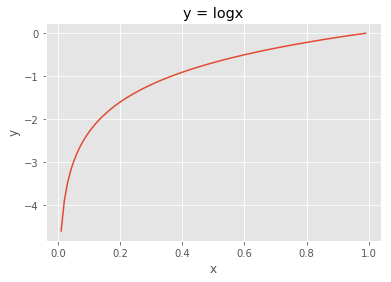

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(0.01,1,0.01)
y = np.log(x)

plt.style.use('ggplot')
plt.plot(x,y)
plt.title('y = logx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*x*が0に近づくにつれて*y*の値が小さくなる。

交差エントロピー誤差の値は、**正解ラベルに対応する出力が大きいほど0に近づく ←→ 出力が小さいほど1に近づく**

## Pythonで実装する

```
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
```

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
"""
「2」を正解とする教師データ
"""
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

"""
「2」の確率が最も高い場合のニューラルネットワークの出力
"""
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338


In [7]:
"""
「7」の確率が最も高い場合のニューラルネットワークの出力
"""
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

2.302584092994546


１つ目の例はおよそ 0.51 ２つ目の例はおよそ 2.30

出力結果が教師データに適合している方が、損失関数が小さくなるというこれまでの議論と一致している。